In [1]:
import pandas as pd
df = pd.read_csv('delivery_time.csv')
df

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [2]:
df.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
df.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [8]:
import matplotlib.pyplot as plt 
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

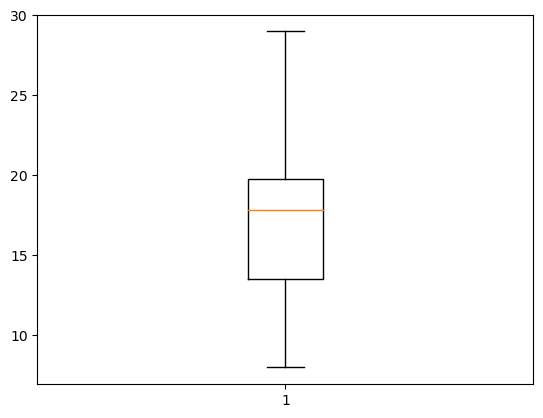

In [14]:
plt.boxplot(df.DeliveryTime)
plt.show

{'whiskers': [<matplotlib.lines.Line2D at 0x29d82ada910>,
 'caps': [<matplotlib.lines.Line2D at 0x29d82af2ca0>,
 'boxes': [<matplotlib.lines.Line2D at 0x29d82adafd0>],
 'medians': [<matplotlib.lines.Line2D at 0x29d82af2a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x29d82af29a0>],
 'means': []}

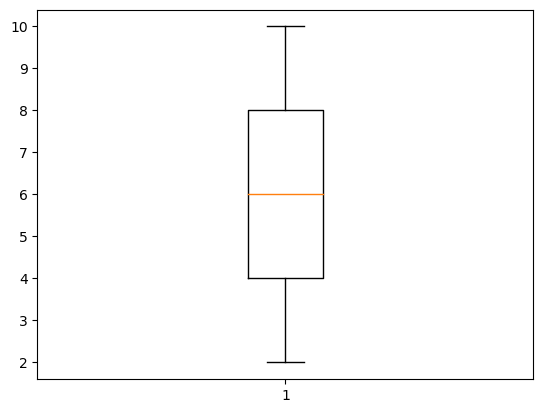

In [15]:
plt.boxplot(df.SortingTime)

(array([1., 3., 3., 1., 0., 3., 4., 1., 2., 3.]),
 array([ 2. ,  2.8,  3.6,  4.4,  5.2,  6. ,  6.8,  7.6,  8.4,  9.2, 10. ]),
 <BarContainer object of 10 artists>)

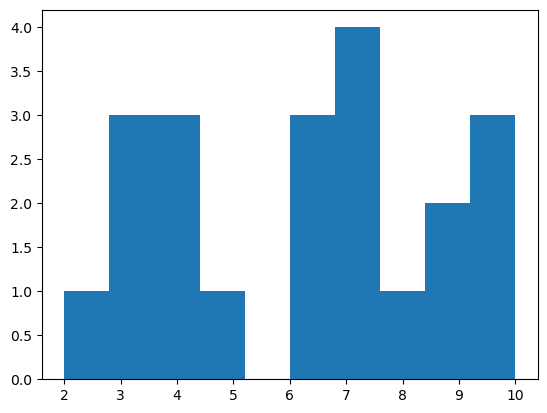

In [16]:
plt.hist(df.SortingTime)

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

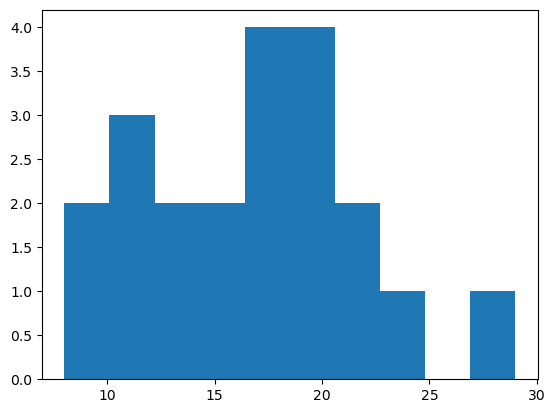

In [17]:
plt.hist(df.DeliveryTime)

C:\Users\my pc\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

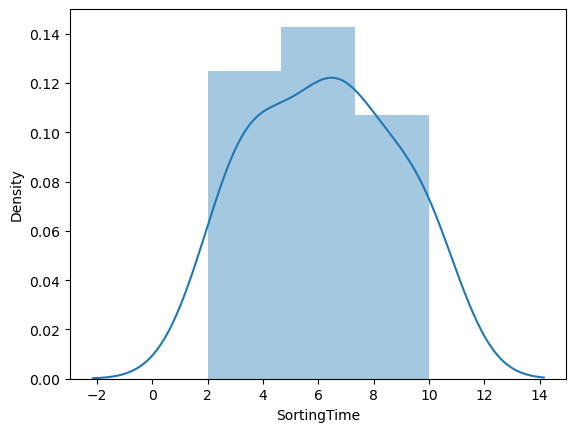

In [20]:
sns.distplot(df['SortingTime'])

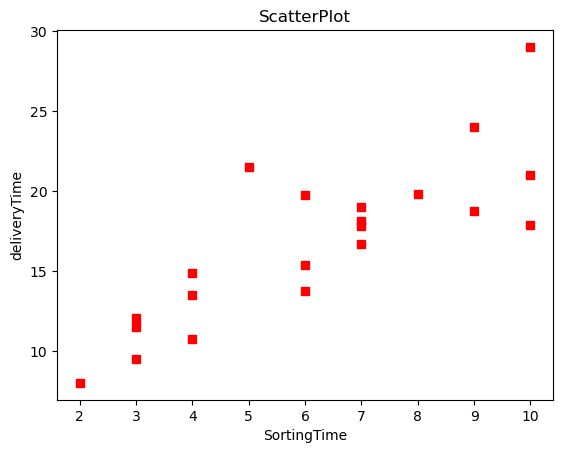

In [22]:
plt.plot(df.SortingTime,df.DeliveryTime,"rs")
plt.xlabel("SortingTime")
plt.ylabel("deliveryTime")
plt.title("ScatterPlot")   
plt.show() 

In [23]:
df.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


In [24]:
import statsmodels.formula.api as smf
model=smf.ols("DeliveryTime~SortingTime",data=df).fit()
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        13:48:12   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [28]:
pred=model.predict(df.SortingTime)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [29]:
import numpy as np

In [30]:
rmse_line = np.sqrt(np.mean(np.array(df['DeliveryTime']-np.array(pred))**2))
rmse_line

2.7916503270617654

[]

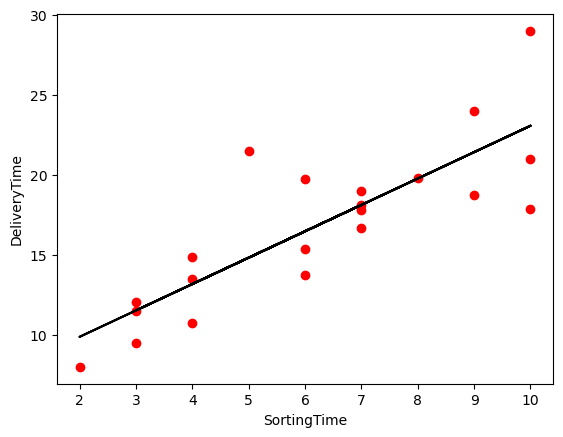

In [32]:
plt.scatter(x=df['SortingTime'],y=df['DeliveryTime'],color='red')
plt.plot(df['SortingTime'],pred,color='black')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime')
plt.plot()

In [43]:
#log model
model2 = smf.ols("DeliveryTime~np.log(SortingTime)",data=df).fit()
model2.params

Intercept              1.159684
np.log(SortingTime)    9.043413
dtype: float64

In [35]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           2.64e-06
Time:                        14:02:46   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(SortingTime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model2.resid

0    -0.982913
1    -0.196517
2     2.386695
3     2.969906
4     7.017087
5    -2.013305
6     0.242646
7    -1.594889
8    -4.082913
9    -2.280094
10   -0.134933
11   -2.946517
12   -2.077354
13    0.405111
14    0.935111
15    1.183483
16   -3.613305
17   -0.647354
18    0.571900
19   -0.927354
20    5.785504
dtype: float64

In [47]:
pred2=model2.predict(df.SortingTime)
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [48]:
rmse_log = np.sqrt(np.mean((np.array(df['DeliveryTime'])-np.array(pred2))**2))
rmse_log

2.7331714766820663

In [55]:
pred2.corr(df.DeliveryTime)

0.8339325279256244

Text(0, 0.5, 'DeliveryTime')

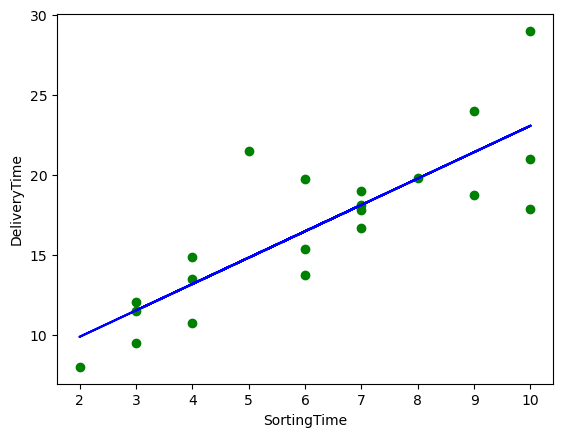

In [42]:
plt.scatter(x=df['SortingTime'],y=df['DeliveryTime'],color='green')
plt.plot(df['SortingTime'],pred2,color='blue')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime') 

In [44]:
#exponential model
model3=smf.ols('np.log(DeliveryTime)~SortingTime',data=df).fit()

In [46]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(DeliveryTime)   R-squared:                       0.711
Model:                              OLS   Adj. R-squared:                  0.696
Method:                   Least Squares   F-statistic:                     46.73
Date:                  Sat, 04 Feb 2023   Prob (F-statistic):           1.59e-06
Time:                          14:49:27   Log-Likelihood:                 7.7920
No. Observations:                    21   AIC:                            -11.58
Df Residuals:                        19   BIC:                            -9.495
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.1214      0.103     20.601      0.000       1.906       2.337
SortingTime     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model3.resid

0    -0.132365
1     0.059111
2     0.228472
3     0.106718
4     0.190408
5    -0.023566
6     0.084206
7    -0.186735
8    -0.292087
9    -0.140142
10    0.021411
11   -0.168672
12   -0.046023
13    0.004320
14    0.049377
15    0.156440
16   -0.133643
17    0.036231
18   -0.253034
19    0.020649
20    0.418923
dtype: float64

In [52]:
pred_log=model3.predict(df.SortingTime)

In [53]:
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [54]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3

0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [56]:
pred3.corr(df.SortingTime)

0.9930106686392967

Text(0, 0.5, 'DeliveryTime')

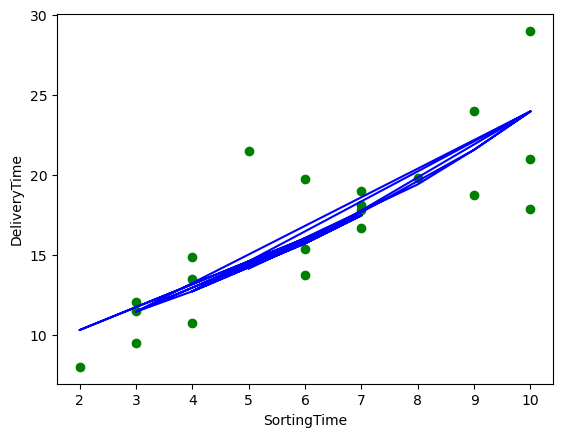

In [57]:
plt.scatter(x=df['SortingTime'],y=df['DeliveryTime'],color='green')
plt.plot(df['SortingTime'],pred3,color='blue')
plt.xlabel('SortingTime')
plt.ylabel('DeliveryTime') 

In [72]:
rmse_exp = np.sqrt(np.mean(np.array(df['DeliveryTime']-np.array(pred3))**2))
rmse_exp

2.940250323056201

In [58]:
#Sqrt model
model4=smf.ols("DeliveryTime~np.sqrt(SortingTime)",data=df).fit()

In [59]:
model4.params

Intercept              -2.518837
np.sqrt(SortingTime)    7.936591
dtype: float64

In [61]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 04 Feb 2023   Prob (F-statistic):           2.61e-06
Time:                        15:14:17   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -2.5188      2.995     -0.841      0.411      -8.788       3.751
np.sqrt(SortingTime)     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [63]:
pred_sqrt=model4.predict(df.SortingTime)
pred_sqrt

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [74]:
rmse_sqrt = np.sqrt(np.mean(np.array(df['DeliveryTime']-np.array(pred_sqrt))**2))
rmse_sqrt

2.7315432100912105

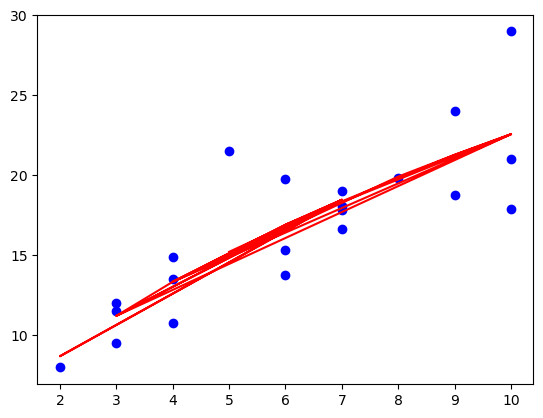

In [69]:
plt.scatter(df.SortingTime,df.DeliveryTime,c="b")
plt.plot(df.SortingTime,pred_sqrt,"r") 

In [70]:
import pandas as pd 

In [75]:
data = {"MODEL":pd.Series(["rmse_line","rmse_log","rmse_exp","rmse_sqrt"]),
        "RMSE_Values":pd.Series([rmse_line,rmse_log,rmse_exp,rmse_sqrt]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared,model3.rsquared,model4.rsquared])}
table=pd.DataFrame(data)
table

,MODEL,RMSE_Values,Rsquare
0,rmse_line,2.791650,0.682271
1,rmse_log,2.733171,0.695443
2,rmse_exp,2.940250,0.710948
3,rmse_sqrt,2.731543,0.695806
